# Cat vs Dog CNN

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
import os
import datetime
%load_ext tensorboard

## Prepara Data

In [2]:
DIR = "../../dogs_cats"
TAGS = ['cat','dog']
with open(os.path.join(DIR,'label_data.pickle'), 'rb') as f:
    label_data = pickle.load(f)
random.shuffle(label_data)

In [3]:
print(type(label_data))
print(label_data[0][0].shape)

<class 'list'>
(100, 100)


In [4]:
def get_x_y_train_data(label_data):
    x_train = []
    y_train = []

    for x,y in label_data:
        x_train.append(x)
        y_train.append(y)
    return x_train, y_train

x_train,y_train = get_x_y_train_data(label_data)

In [5]:
X = np.array(x_train).reshape(-1,100,100,1)/255.0
y = np.array(y_train).reshape(-1,2)
print(X.shape,y.shape)

(25000, 100, 100, 1) (25000, 2)


## Build Model

In [14]:
model = Sequential([
    Conv2D(8,3,padding='same', activation='relu'), # 1st Conv with pooling
    MaxPool2D(2, strides=2),
    Conv2D(8,5, activation='relu'), 
    MaxPool2D(2, strides=2),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(2,   activation = 'softmax')
])

In [17]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [18]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [19]:
tf.keras.backend.set_floatx('float64')
history = model.fit(
    X, y, 
    epochs=10,batch_size=32,
    validation_split=0.3,verbose = 0,
    callbacks=[tensorboard_callback]
)

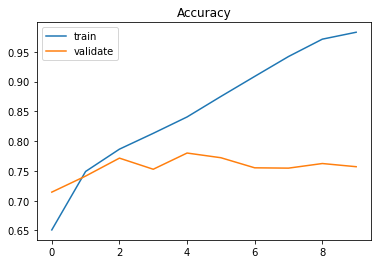

In [10]:
plt.plot(history.history['accuracy'],label="train")
plt.plot(history.history['val_accuracy'],label="validate")
plt.title('Accuracy')
plt.legend()
plt.show()

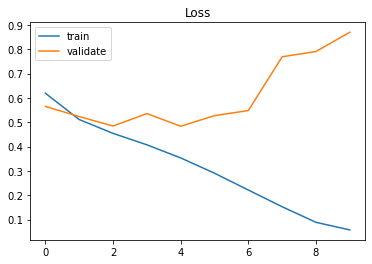

In [11]:
plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validate")
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
tf.keras.backend.clear_session()

In [13]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 15204), started 0:01:49 ago. (Use '!kill 15204' to kill it.)